In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [47]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, fbeta_score

df = pd.read_csv('../data/GeneralDatensatz18-21ohneGeo-mitLockdown_mitCorona.csv', sep=';')
target = 'UKATEGORIE'
features = ['UMONAT','USTUNDE','UWOCHENTAG','UART','USTRZUSTAND','BEZ','UTYP1','ULICHTVERH','IstRad','IstPKW','IstFuss','IstKrad','IstGkfz','IstSonstige', 'LOCKDOWN', 'COVID']


# Stratified KFold-Konfiguration
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#für tödliche und schwere vs. leichte Unfälle  -> 1 ist schwer oder tödlich, 0 ist leicht
X = df[features]

y = df[target].isin([1, 2]).astype(int)

beta = 9
fbeta_scorer= make_scorer(fbeta_score, beta=beta)

In [48]:
# Codieren der kategorischen Merkmale
X = pd.get_dummies(X, columns=features)

In [49]:
# Codieren der kategorischen Merkmale


In [50]:
from sklearn.model_selection import cross_val_score

# Trainieren des Modells
model = RandomForestClassifier(n_estimators= 344, min_samples_split= 400, min_samples_leaf= 8, max_features= 'log2', max_depth= 15, class_weight= {0: 1, 1: 9}, random_state=42)
model.fit(X, y)
result_fbeta = cross_val_score(model, X, y, cv=kf, scoring=fbeta_scorer)
print("score: ", result_fbeta.mean())

score:  0.8720825145080348


In [51]:
# Extrahieren der Feature-Importanzen
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

In [52]:
# Aggregieren der Importanzen nach den ursprünglichen Merkmalen
feature_importance_df['OriginalFeature'] = feature_importance_df['Feature'].apply(lambda x: x.split('_')[0])
category_importance = feature_importance_df.groupby('OriginalFeature').sum().reset_index()

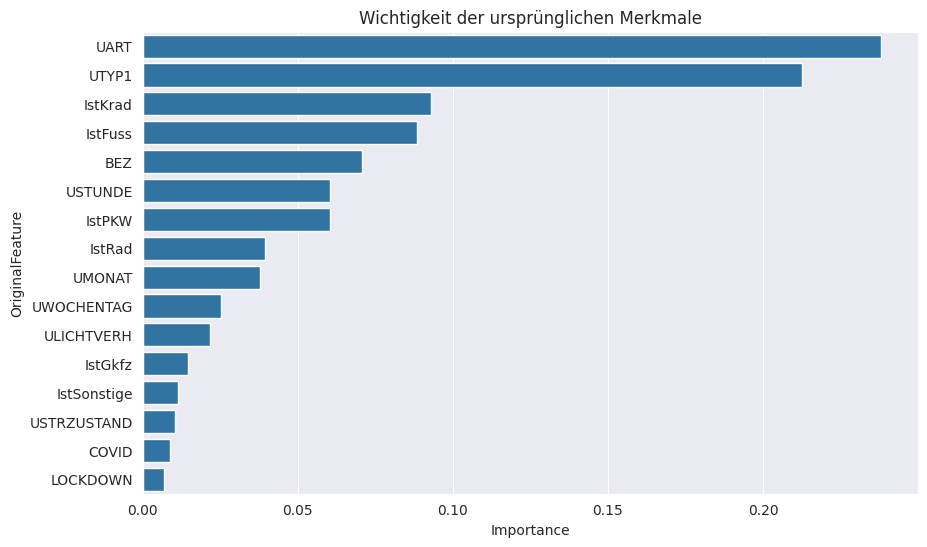

In [53]:
# Plotten der Feature-Importanzen
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='OriginalFeature', data=category_importance.sort_values(by='Importance', ascending=False))
plt.title('Wichtigkeit der ursprünglichen Merkmale')
plt.show()

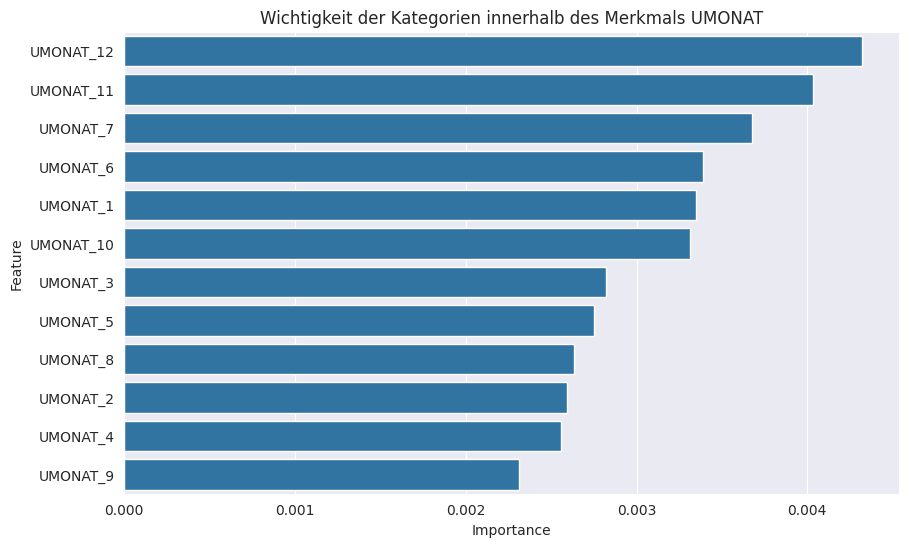

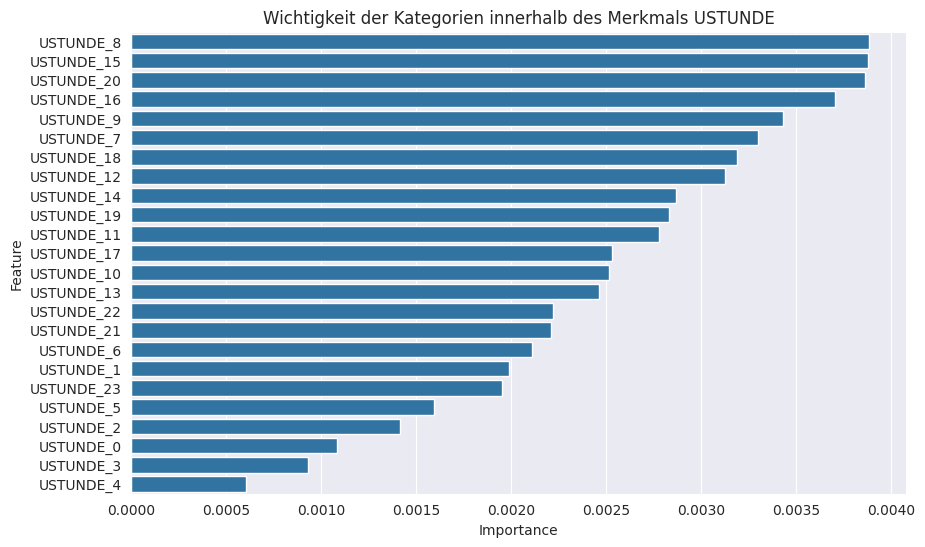

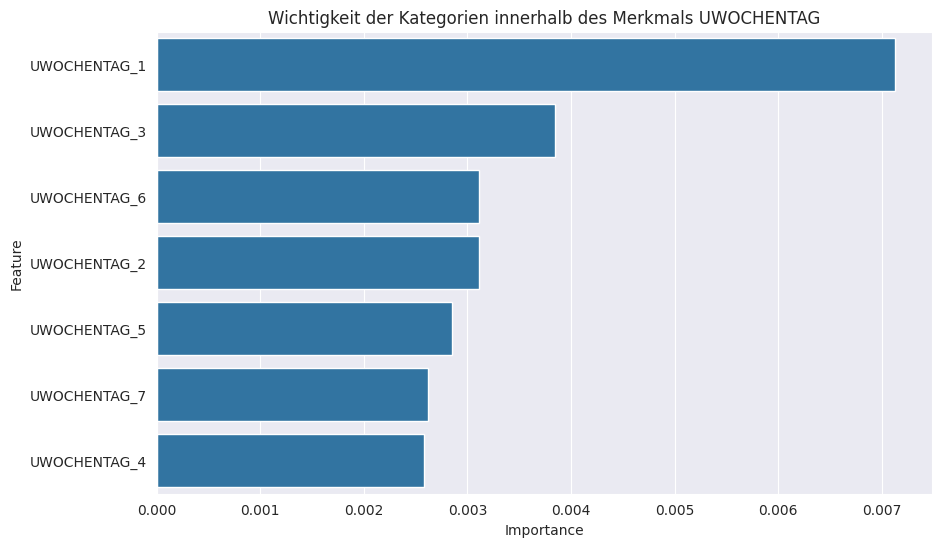

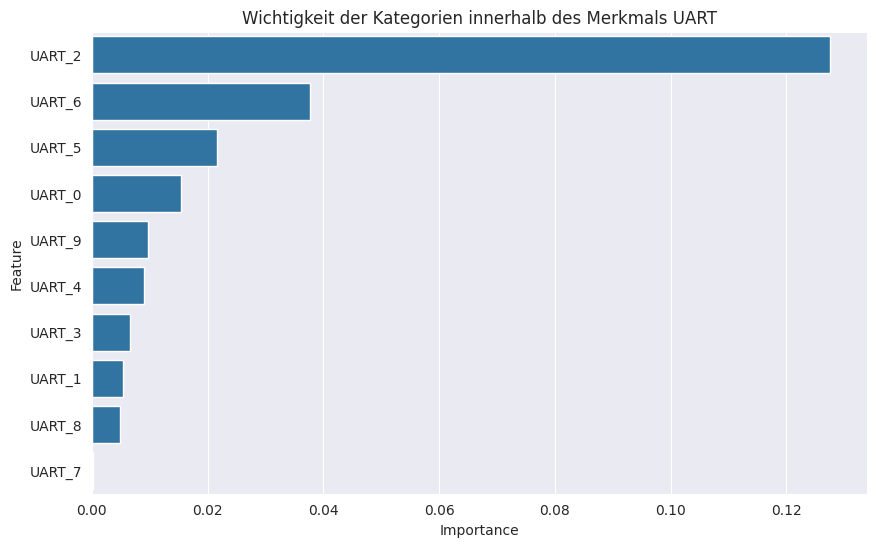

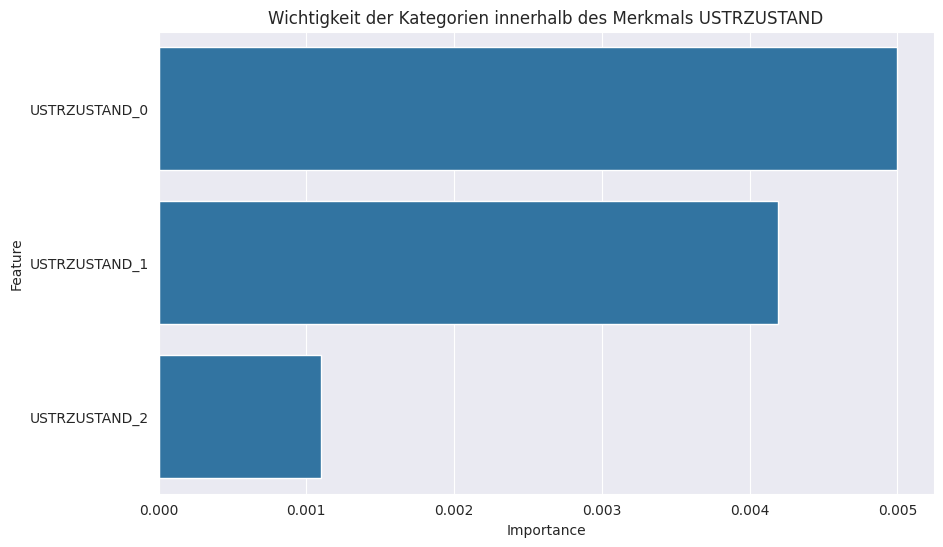

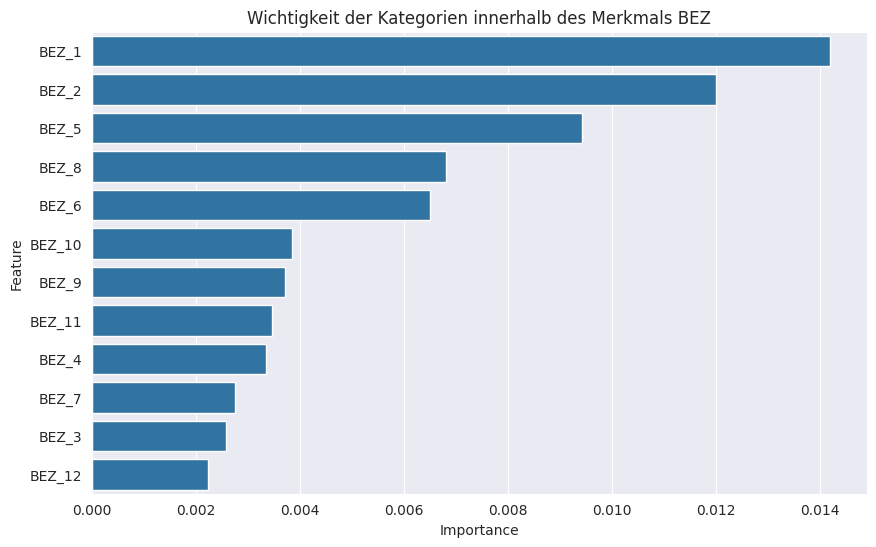

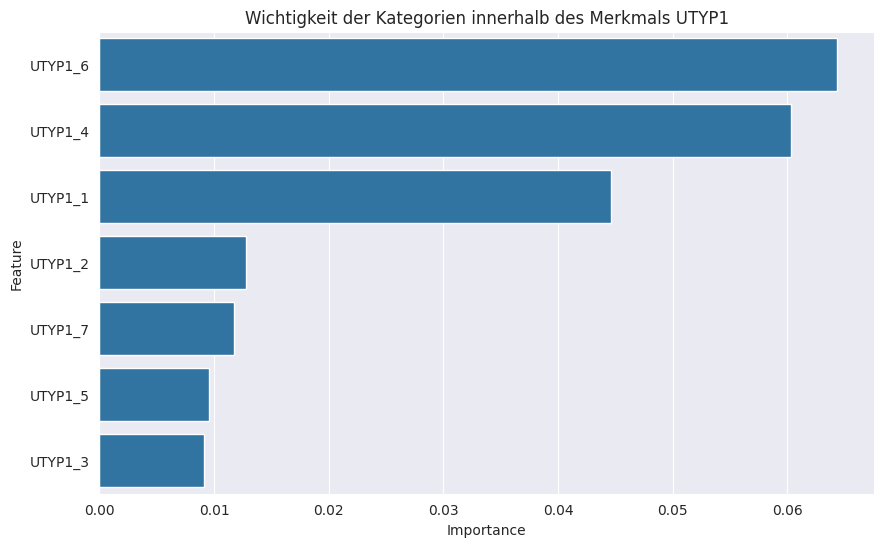

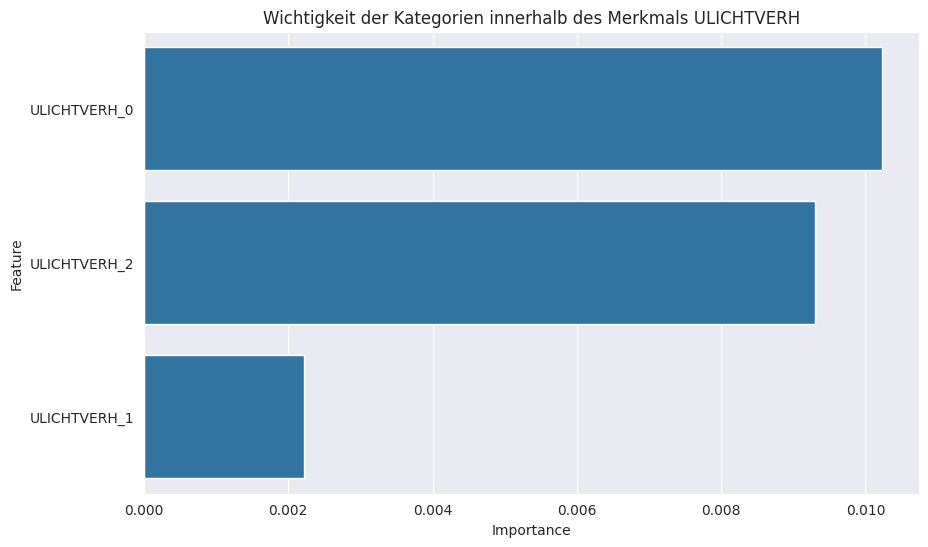

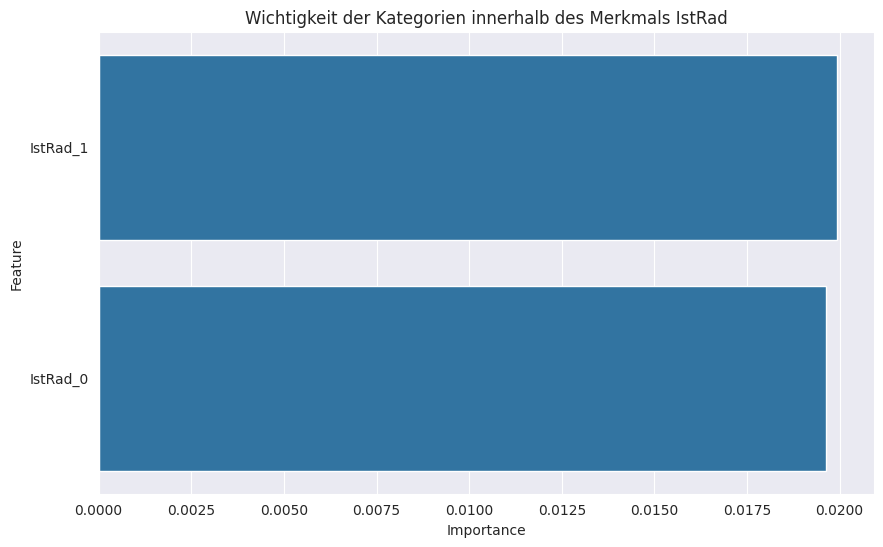

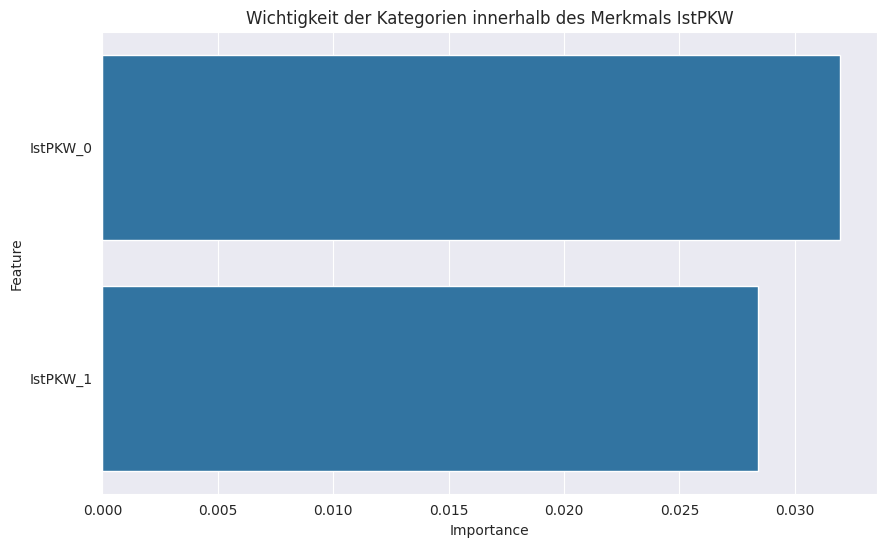

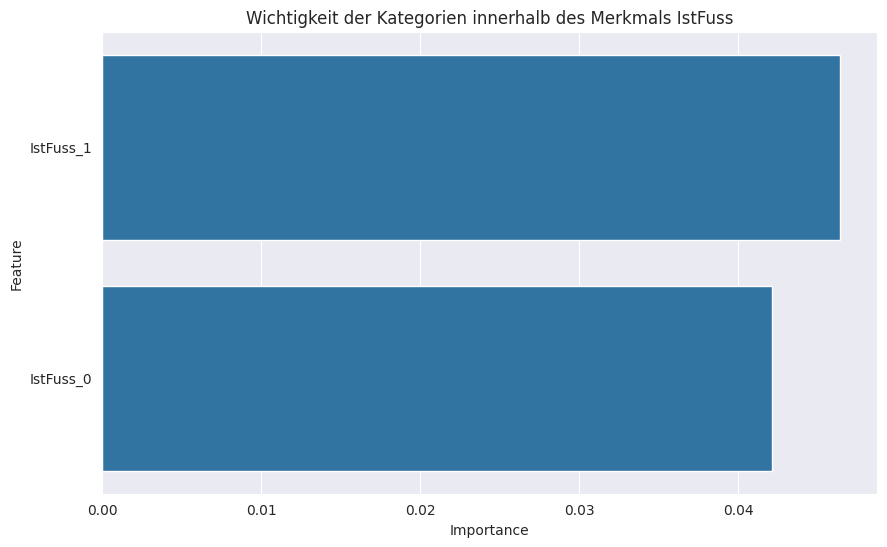

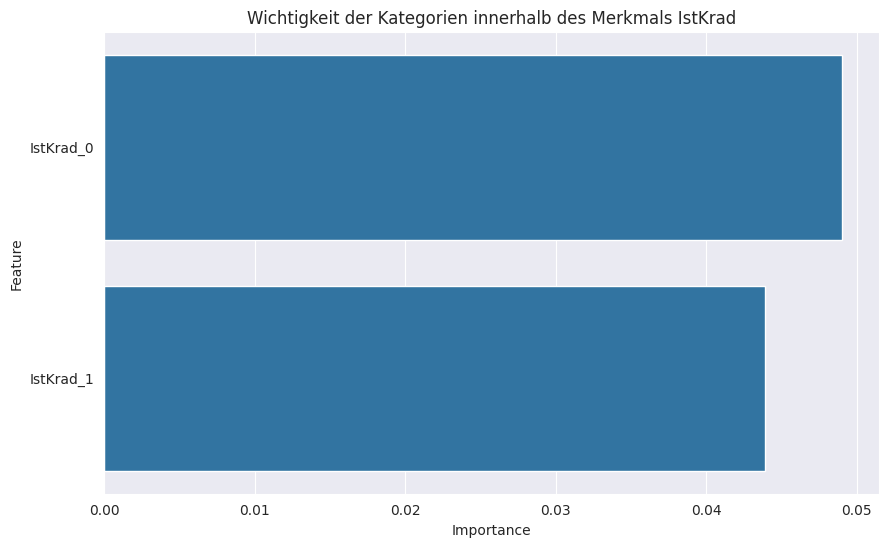

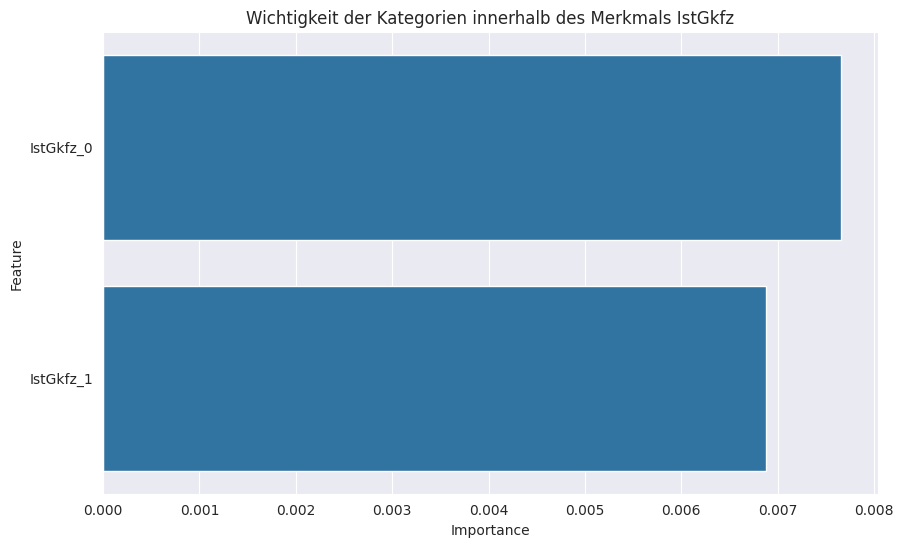

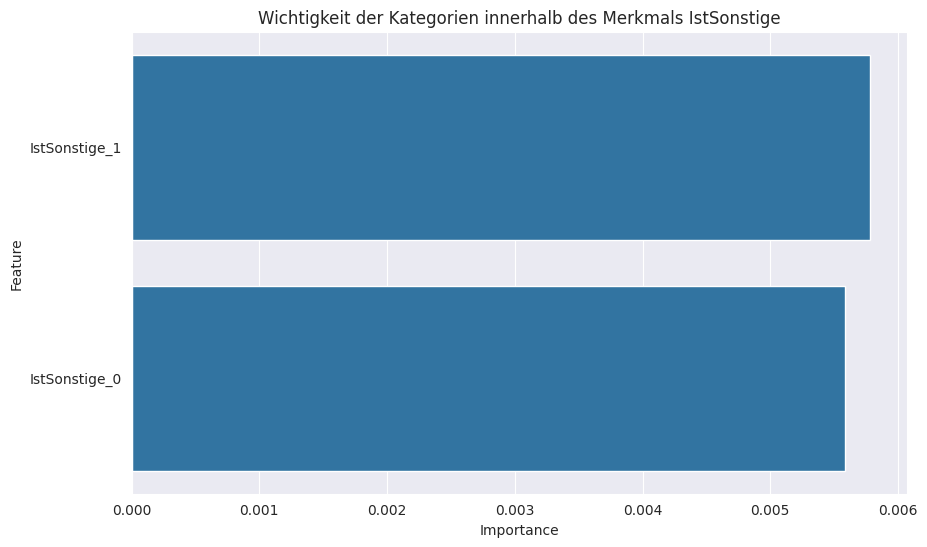

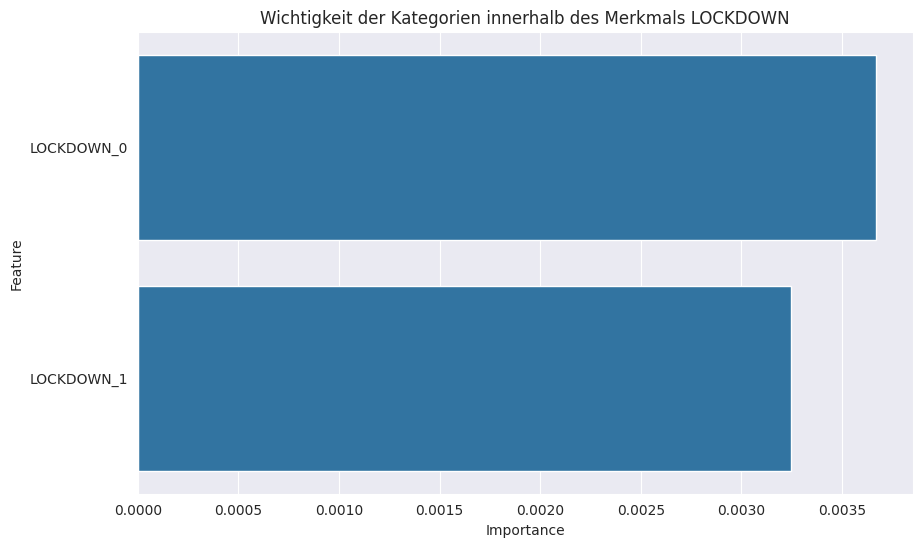

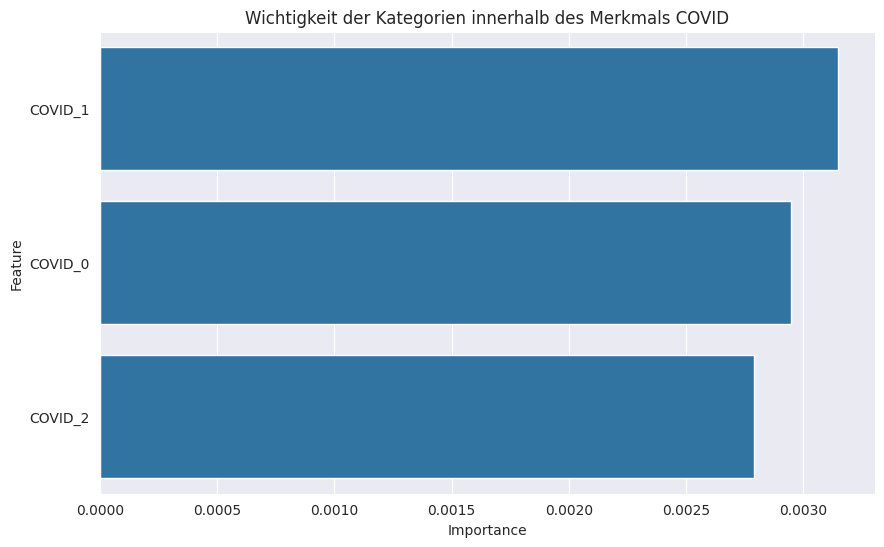

In [54]:
# Plotten der wichtigsten Kategorien innerhalb der Merkmale
for feature in features:
    subset = feature_importance_df[feature_importance_df['OriginalFeature'] == feature]
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=subset.sort_values(by='Importance', ascending=False))
    plt.title(f'Wichtigkeit der Kategorien innerhalb des Merkmals {feature}')
    plt.show()